In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Gradient Descent

<b>Gradient descent</b>, also known as <b>steepest descent</b>, is an optimization algorithm for finding the local minimum of a function. To find a local minimum, the function "steps" in the  direction of the negative of the gradient. <b>Gradient ascent</b> is the same as gradient descent, except that it steps in the direction of the positive of the gradient and therefore finds local maximums instead of minimums. The algorithm of gradient descent can be outlined as follows:

### Pseudocode 1
&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ and learning rate $\eta$<br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \eta s_k$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>

## An example function

As a simple example, let's find a local minimum for the function $f(x) = x^3-2x^2+2$

I have decided to use this notebook to introduce _sympy_ to the class. 

Sympy is a python library for symbolic math -- it can find exact solutions by applying rules algebra and calculus to mathamatical symbols, rather then numbers. 

What is useful for lazy programmers, is that you can use it to compute derivatives for and exact roots (sometimes). 

In [2]:
#!conda install -y sympy

In the next cell, we use `sympy` to creare symbolic and numeric versions of an example function. 

In [3]:
import sympy as sp


sym_f = sp.sympify("x**3 - 2*x**2 + 2") # Convert string (python syntax) to symbolic expression
sym_df = sym_f.diff("x")  # Derivitive wrt x

f = sp.lambdify("x",sym_f)  # Convert symolic expression to python function
df = sp.lambdify("x",sym_df)

print("    f:", sym_f)
print("df/dx:", sym_df)

    f: x**3 - 2*x**2 + 2
df/dx: 3*x**2 - 4*x


In [4]:
sym_x = sp.symbols("x")

In [5]:
sp.init_printing()

In [6]:
sym_x**2

* The `sympy` library does symbolic math. 
* Pytorch also keeps track of the oprerations doens to variables and can calculate derivitives, but unlike sympy it is focused on efficient application of the chain rule. 

Although some symbolic tools (e.g. Mathematica) unclude functions to find exact minima, I am not aware of such a function for sympy. 

However, we can find the roots of any function. The local minima and maxima are roots of the derivative. 

In [7]:
extrema = [float(x) for x in sp.solve(sym_df, "x")]
print("extrema:", extrema)

extrema: [0.0, 1.3333333333333333]


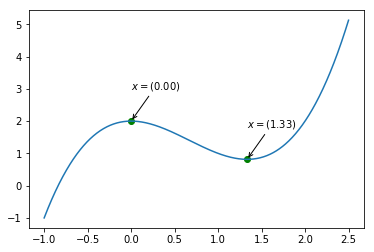

In [8]:
domain = linspace(-1,2.5,1000)
plot(domain,f(domain))
for x in extrema:
    scatter(x, f(x), c='g')
    annotate("$x=({:0.2f})$".format(x), (x, f(x)), 
             xytext=(0,32), textcoords='offset points',  # Offset to annotation (points)
             arrowprops={'arrowstyle':'->'})
show()

We can see from plot above that a local minimum is going to be near around 1.3 or 1.4 (on the x-axis) and there is no global minimum, but let's pretend that we don't know that, so we set our starting point (arbitrarily, in this case) at $x_0 = 2$

---
**Did You Know:** What do the '$' symbols in string I used as the annotation mean?  

**Answer:** The dollar sign symbols wrap mathematical expressions that will be typset using $\LaTeX$, the standern notation for writing math. They also work in Jupyter notebook cells like this one. 

---
**Did You Notice:** Which python module uses _symbolic math_ to solve math problems including  finding roots and derivatives? How does this compare to pytorch?


**Answer:** `sympy`

---
**Did You Notice:** Which function converts a string into a symbolic expression? 

**Answer:** `sp.sympify`

---
**Did You Notice:** Which function converts a symbolic expression into a python function?

**Answer:** `sp.lamdify(vars, symbolic-expression)`

---
**Did You Notice:** Which function allows you to place text in a plot, including a line or arrow pointing at part of the plot? Explain how do you specify the location of the text relative to the point you wish to annotate. 


**Answer:** The `annotate` method of `matplotlib`. 

*Example:*
>```python
    annotate("$x=({:0.2f})$".format(x), (x, f(x)), 
             xytext=(0,32), textcoords='offset points',  # Offset to annotation (1 point = 1/72 of an inch)
             arrowprops={'arrowstyle':'->'})
```

## Implementing the Pseudocode

Note that I have chosen to implement this in a style that is similar to the `torch.optim.Optimizer` interface for iterative optimization. The `__init__` method sets up the optimizer and you call `update` to improve the current state.  

Since we will be using torch for optimization problems we should be (or we will beciome) familiar with this pattern.

In [9]:
class BatchGradientDescent():
    """Gradient Descent
    
    Properties
    ----------
    x: Current parameters
    f: The function we are minimizing
    df: The derivative of f wrt x
    lr: The learning rate (step size)
    """
    
    def __init__(self, x, f, df, lr=0.01):
        """ Gradient descent (called Batch Gradient Descent in machine learning). 
        
        Parameters
        ----------
        x:number or array
            Initial guess
        f:callable 
            Function to minimize
        df:callable
            Derivative of f with respect to x
        lr:float
            The learning rate (called $eta$ in psudocode)
        """
        super().__init__()
        self.lr = lr
        self.f = f
        self.df = df
        self.x = x
         
    def update(self):
        """Update our estimate of x"""
        step = -self.df(self.x)
        self.x = self.x + self.lr * step


**Did You Notice:** What is a docstring? How do you document a class, vs a method?

**Whats Your Opinion:** I kep track of the history of all past guess and function values via a pair of lists inthe optimizer. Is this good design? Why or why not?

**Answers Vary:** I made my decision to keep the exposition of this notebook simple. However in general it is better to keep the responsibitilities of each class limited. The history could be maintained if needed (and only if needed) outside of thie class. That would be better if I were designing a library. 

**Answer:** If the first line of a function or class is a string, that is used as documentation. You can print it using `help(foo)` or using <kbd>TAB</kbd> or `?foo` in Jupyter. 

The docstring for a function explains the _parameters_ and the _return values_. The docstring for a class explains the _attrbutes_ or _properties_. 

In [10]:
opt = BatchGradientDescent(x=2.2, f=f, df=df, lr=0.02)

hist_x = [opt.x]
for k in range(100):
    opt.update()
    hist_x.append(opt.x)
hist_f = [f(x) for x in hist_x]

Next, lets look at the rate at which our function is reduced over time.

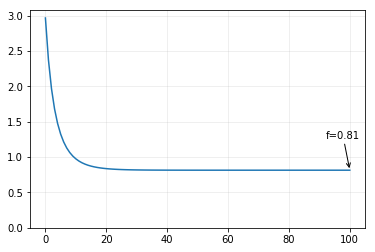

In [11]:
plot(hist_f);
annotate("f={:0.2f}".format(f(opt.x)), (100, f(opt.x)), 
         xytext=(-24,32), textcoords='offset points', arrowprops={'arrowstyle':'->'} )
grid(alpha=0.25)
ylim(ymin=0);

> **Figure {fig:gd-plot}** A plot of the function (e.g. loss) over time. For this well behaved function the value decreases monotonically, initially decreasing a lot and then very slowly creaping towards the optimal solution.

In [12]:
print("Local minimum occurs at:", opt.x)
print("True stationary points are at:", extrema)

Local minimum occurs at: 1.3334535634080888
True stationary points are at: [0.0, 1.3333333333333333]


Next, lots look at the path we took towards the minimim. 

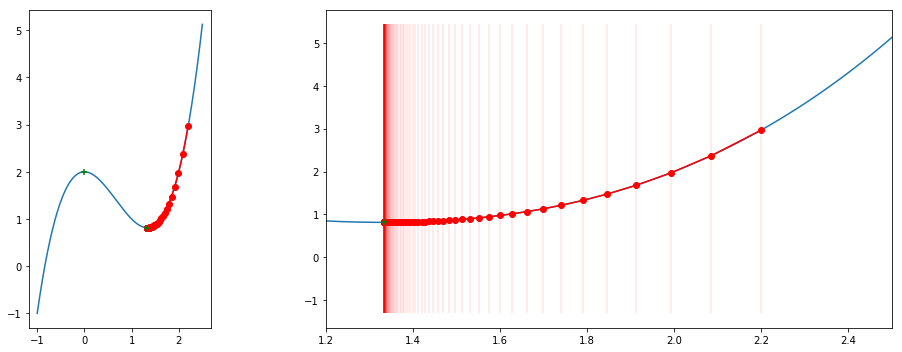

In [13]:
figsize(15, 5)
subplot(121)
plot(domain,f(domain))
plot(hist_x, hist_f, c='r', marker='o');
scatter(*zip(*[(float(x), f(float(x))) for x in sp.solve(sym_df, "x") ]), c='g', marker='+', zorder=3)
axis('scaled')

subplot(122)
plt.plot(domain,f(domain))
plot(hist_x,  hist_f, c='r', marker='o');
vlines(hist_x, *ylim(), color='r', alpha=0.1)
scatter(*zip(*[(float(x), f(float(x))) for x in sp.solve(sym_df, "x") ]), c='g', marker='+', zorder=3)
xlim(1.2,2.5)
tight_layout()

> **Figure {fig:gd-steps}:** An illustration of gradient descent: 
(left) a series of parameter updates starting at $x=2$; 
(right) a detail of the same plot that shows how the velocity reduces as the parameter function becomes more flat. Vertical lines illustrate the step sizes, and green markers show the stationary points of the function. 

You'll notice that the step size (also called learning rate) in the implementation above is constant, unlike the algorithm in the pseudocode below. Doing this makes it easier to implement the algorithm. However, it also presents some issues: If the step size is too small, then convergence will be very slow, but if we make it too large, then the method may fail to converge at all. 

Another problem with constant learning rate is that it is easy to end up bouncing back and forth betweent he walls of a narrow valley. 

Consider the rational function below...

In [14]:
sym_f = sp.sympify("-1/(.25 + (x-0.5)**2)") # Convert string (python syntax) to symbolic expression
sym_df = sym_f.diff("x")  # Derivitive wrt x

f = sp.lambdify("x",sym_f)  # Convert symolic expression to python function
df = sp.lambdify("x",sym_df)

extrema = [float(x) for x in sp.solve(sym_df, "x")]

print("    f:", sym_f)
print("df/dx:", sym_df)
print("extrema:", extrema)

    f: -1/((x - 0.5)**2 + 0.25)
df/dx: -(-2*x + 1.0)/((x - 0.5)**2 + 0.25)**2
extrema: [0.5]


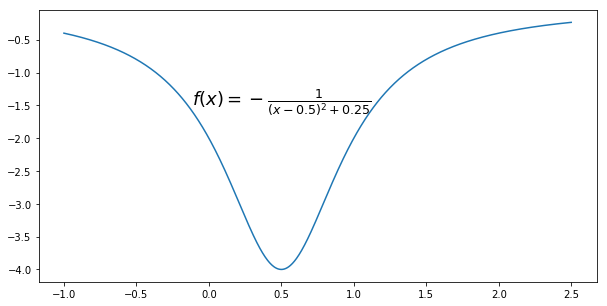

In [15]:
figsize(10,5)
plot(domain, [f(x) for x in domain]);
annotate('$f(x) = {}$'.format(sp.latex(sym_f)), (0.5, -1.5), fontsize=18, horizontalalignment='center');

**Did You Notice:** Which sympy function did I use to typeset the equation? 

**Did You Notice:**  Where is the text position relative to the `xy` parameter in `annotate`? How did I change that?

**Answer:** Text is usuall position with the left, baseline at the given XY. The baseline is where the bottom of an 'o' (not a 'g') sits. You can change this by passing `horizontalalignment=` or `verticalalignment=`.  

**Answer:** `sp.latex(sym_f)`.  In order to render it in the plot I surrounded the latex expression with `$` symbols. 

In [16]:
opt = BatchGradientDescent(x=2.2, f=f, df=df, lr=0.11)

hist_x = [opt.x]
for k in range(100):
    opt.update()
    hist_x.append(opt.x)
hist_f = [f(x) for x in hist_x]

In the next plot, notice that we never reallay acheive the miniumum value of the function. 

In [17]:
print([f(x) for x in extrema])

[-4.0]


Instead we dip down and then get stuck (bouncing back and forth between walls of the function)

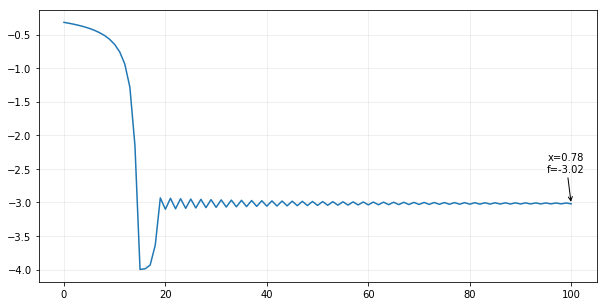

In [18]:
plot(hist_f);
annotate("x={:0.2f}\nf={:0.2f}".format(opt.x, f(opt.x)), (100, f(opt.x)), 
         xytext=(-24,32), textcoords='offset points', arrowprops={'arrowstyle':'->'} )
grid(alpha=0.25)
#ylim(ymin=0);

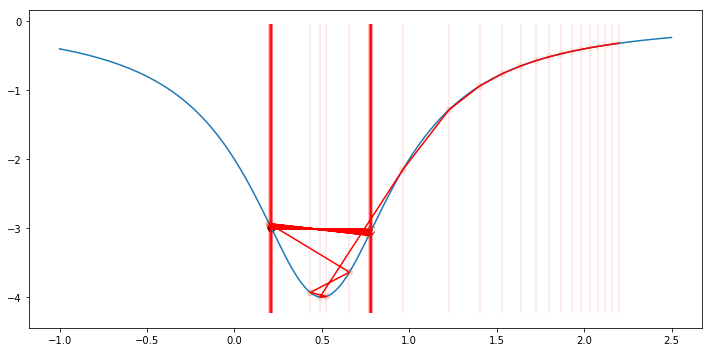

In [19]:
colors = cm.Reds(linspace(0, 1, 100))

plt.plot(domain,f(domain))
plot(hist_x, hist_f, c='r');
scatter(hist_x, hist_f, c=colors);
vlines(hist_x, *ylim(), color='r', alpha=0.1)
tight_layout()

This is not guaranteed to happen but it is more likely than you expect, espcially in $n-$dimensional functions. 

A large number of improvements have been made to gradient descent to solve this and other problems. 

One approach is to reduce the learning rate over time.

### Pseudocode 2
&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ and learning rate $\eta_0$<br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \eta s_k$ <br>
&nbsp;&nbsp;&nbsp;    5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\eta_{k+1} = \eta_k / (1+ k \times d)$. <br>
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

In [20]:
class TimeBasedDecayGD(BatchGradientDescent):
    def __init__(self, x, f, df, lr=0.01, decay=0.001):
        super().__init__(x, f, df, lr)
        self.decay = decay
        self.iterations = 0
        
    def update_lr(self):
        self.iterations +=1
        self.lr /= (1 + self.iterations * self.decay) 
    
    def update(self):
        super().update()
        self.update_lr()


In [21]:
opt = TimeBasedDecayGD(2.0, f, df, lr=0.1, decay=0.001)

hist_x = [opt.x]
hist_f = [f(opt.x)]
hist_lr = [opt.lr]

for k in range(100):
    opt.update()
    
    hist_x.append(opt.x)
    hist_f.append(f(opt.x))
    hist_lr.append(opt.lr)

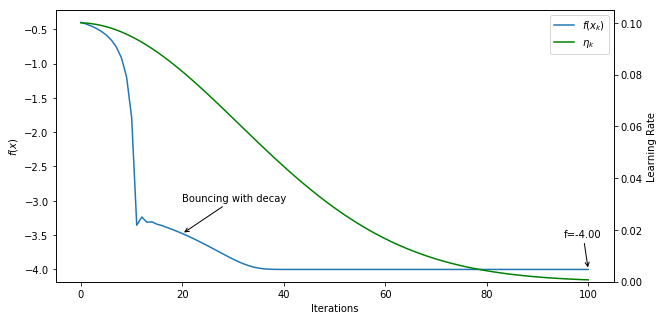

In [22]:
ax = gca()
fplot = plot(hist_f, label="$f(x)$");

annotate("f={:0.2f}".format(hist_f[-1]), (100, hist_f[-1]), 
         xytext=(-24,32), textcoords='offset points', arrowprops={'arrowstyle':'->'} )
ylabel("$f(x)$")
xlabel("Iterations");

ax2 = twinx()
lrplot = plot(hist_lr, c='g', label="$\eta_k$")
ylabel("Learning Rate")
ylim(ymin=0)

sca(ax)
annotate("Bouncing with decay", (20, hist_f[20]), 
         xytext=(0, 32), textcoords="offset points", arrowprops={'arrowstyle':'->'} )

legend(fplot + lrplot, ["$f(x_k)$", "$\eta_k$"]);

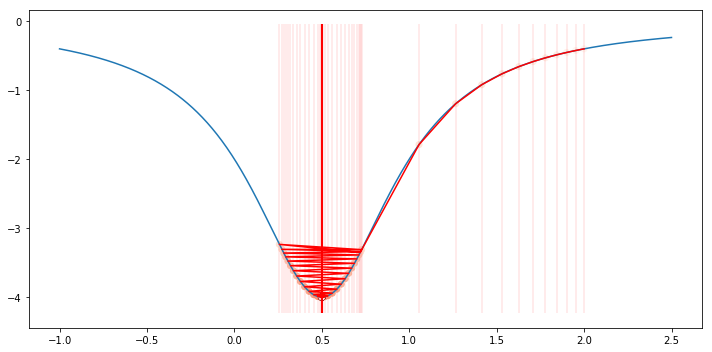

In [23]:
colors = cm.Reds(linspace(0, 1, 100))

plt.plot(domain,f(domain))
plot(hist_x, hist_f, c='r');
scatter(hist_x, hist_f, c=colors);
vlines(hist_x, *ylim(), color='r', alpha=0.1)
tight_layout()

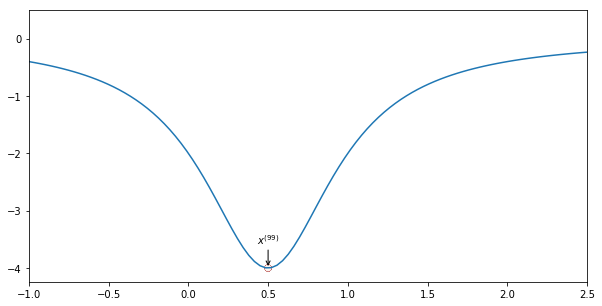

In [24]:

from IPython.display import clear_output

def play_optimization(opt, niter=100, domain=linspace(-1, 2.5, 100)):
    hist_x = [opt.x]
    hist_f = [opt.f(opt.x)]
    
    colors = cm.Reds(linspace(0, 1, 10))
    fig = figure()
    for k in range(100):
        opt.update()
        hist_x.append(opt.x)
        hist_f.append(opt.f(opt.x))
        
        clf()
        plt.plot(domain,opt.f(domain))
        k0 = max(0, k+1-10)
        plot(hist_x[k0:], hist_f[k0:], c='r');
        scatter(hist_x[k0:], hist_f[k0:], c=colors);
        annotate("$x^{{ ({}) }}$".format(k), (opt.x, opt.f(opt.x)), horizontalalignment='center',
                  xytext=(0, 24), textcoords="offset points", arrowprops={'arrowstyle':'->'} )
        #vlines(opt.hist_x[k0:k], *ylim(), color='r', alpha=0.1)
        xlim(-1, 2.5)
        ylim(-4.24, 0.5)
        clear_output(wait=True)
        fig.canvas.draw()
        display(fig)
    clear_output(wait=True)


play_optimization(TimeBasedDecayGD(2.0, f, df, lr=0.1, decay=0.001))

This helpud us eventuall converge to the minimum, bit it is still problematic. 

We seem to be wasting energy bouncing back and forth, and we even _increase_ the function in some iterations. 


There are a number of simple heuristice that can be used to try to **cancel out the alternating direction**. One of them is **momentum**. 

The key idea:
* We compute the step $\mathbf{s}^{(k)} = -\nabla f(\mathbf{x}^{(k)})$ as usual. 
* The next direction $\mathbf{v}^{(k)} =\beta\mathbf{v}^{(k-1)} + (1-\beta)\mathbf{s}^{(k)}$
* The update is now $\mathbf{x}^{(k)} = \eta_k \mathbf{v}^{(k)}$. 

In [25]:
class MomentumGD(TimeBasedDecayGD):
    def __init__(self, x, f, df, lr=0.01, decay=0.001, momentum=0.9):
        super().__init__(x, f, df, lr, decay)
        self.momentum = momentum
        self.velocity = 0 #  will be treateld like a vector after update
    
    def update(self):
        step = -self.df(self.x)
        self.velocity = self.velocity*self.momentum + (1-self.momentum)*step
        self.x = self.x + self.lr * self.velocity        
        self.update_lr()

In [26]:
opt = MomentumGD(2.0, f, df, lr=0.1, decay=0, momentum=0.9) # No time based decay 

hist_x = [opt.x]
hist_f = [opt.f(opt.x)]
hist_lr = [opt.lr]
for k in range(100):
    opt.update()
    
    hist_x.append(opt.x)
    hist_f.append(opt.f(opt.x))
    hist_lr.append(opt.lr)

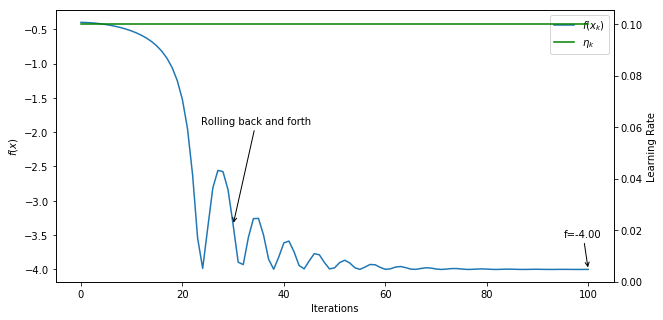

In [27]:
ax = gca()
fplot = plot(hist_f, label="$f(x)$");

annotate("f={:0.2f}".format(hist_f[-1]), (100, hist_f[-1]), 
         xytext=(-24,32), textcoords='offset points', arrowprops={'arrowstyle':'->'} )
ylabel("$f(x)$")
xlabel("Iterations");

ax2 = twinx()
lrplot = plot(hist_lr, c='g', label="$\eta_k$")
ylabel("Learning Rate")
ylim(ymin=0)

sca(ax)
annotate("Rolling back and forth", (30, hist_f[30]), 
         xytext=(-32, 100), textcoords="offset points", arrowprops={'arrowstyle':'->'} )

legend(fplot + lrplot, ["$f(x_k)$", "$\eta_k$"]);

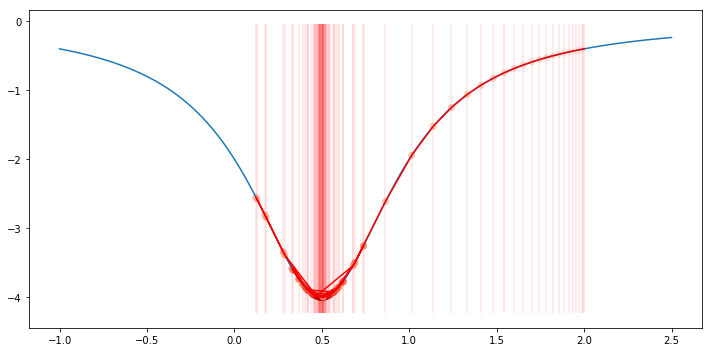

In [28]:
colors = cm.Reds(linspace(0, 1, 100))

plt.plot(domain,f(domain))
plot(hist_x, hist_f, c='r');
scatter(hist_x, hist_f, c=colors);
vlines(hist_x, *ylim(), color='r', alpha=0.1)
tight_layout()

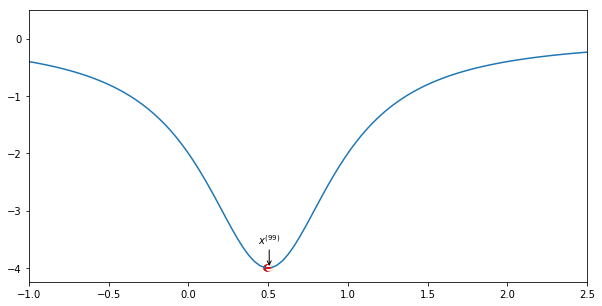

In [29]:
play_optimization(MomentumGD(2.0, f, df, lr=0.1, decay=0, momentum=0.9))

In this particular example, it is hard to say whether _momentum_ or _time based decay_ is more helpful, but momentum has other benefits, especially for multiple paramters. 

In [30]:
sym_x = sp.symbols("x")
sym_noisy_f = sym_f*(1+0.1*sp.cos(20*sym_x))
sym_noisy_df = sym_noisy_f.diff("x")
noisy_f = sp.lambdify("x", sym_noisy_f)
noisy_df = sp.lambdify("x", sym_noisy_df)

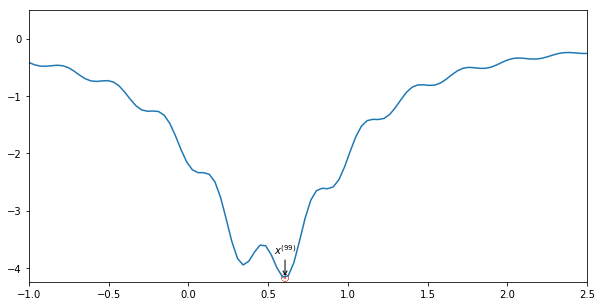

In [31]:
play_optimization(MomentumGD(2.0, noisy_f, noisy_df, lr=0.1, decay=0.001, momentum=0.9))

Let's now consider an example which is a little bit more complicated. Consider a simple linear regression where we want to see how the temperature affects the noises made by crickets. We have a data set of cricket chirp rates at various temperatures. First we'll load that data set in and plot it:

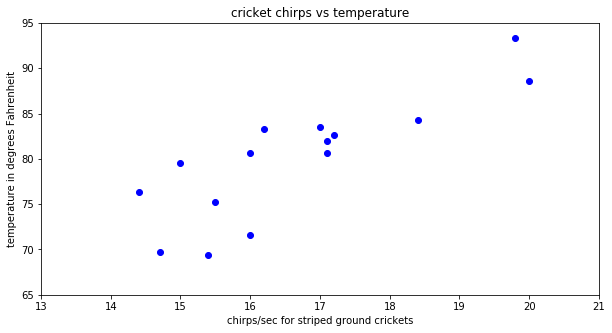

In [32]:
#Load the dataset
data = np.loadtxt('../SGD_data.txt', delimiter=',')
 
#Plot the data
scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('cricket chirps vs temperature')
xlabel('chirps/sec for striped ground crickets')
ylabel('temperature in degrees Fahrenheit')
xlim([13,21])
ylim([65,95])
show()

Our goal is to find the equation of the straight line $y(x | \theta ) = w x + b$ , where $\theta=(b,w)$, that best fits our data points. 
The function that we are trying to minimize in this case is our loss, $J$, defined as the mean squared error:

$J(\theta) = {1 \over 2m} \sum\limits_{i=1}^m (y(x_i|\theta)-t_i)^2$

In this case, our gradient will be defined in two dimensions:

$\frac{\partial}{\partial b} J(\theta) = \frac{1}{m}  \sum\limits_{i=1}^m \{y(x_i|\theta)-t_i\}$

$\frac{\partial}{\partial w} J(\theta) = \frac{1}{m}  \sum\limits_{i=1}^m \{(y(x_i|\theta)-t_i)\}\cdot x_i$

Below, we set up our function for $y$, $J$ and the gradient:

Now, we'll load our data into the x and y variables;

In [33]:
x = data[:, 0]
t = data[:, 1]

In [102]:
def y(x, theta):
    b, w = theta
    return w*x + b

def J(theta):
    loss = 0.
    m = len(x)
    for xi, ti in zip(x,t):
        yi = y(xi, theta)
        loss += (yi - ti)**2
    loss /= (2.*m)
    return loss

def grad_J(theta):
    ddw = 0.
    ddb = 0.
    m = len(x)
    for xi, ti in zip(x, t):
        yi = y(xi, theta)
        ddb += (yi - ti)
        ddw += (yi - ti)*xi
    return array([ddb, ddw], dtype=float)/m

And we run our gradient descent algorithm `BatchGradientDescent`. Note that I had to be careful here to find a learning rate that would not overflow(!)

In [35]:
import tqdm as tq

In [36]:
#This is just BGD. 
opt = MomentumGD(np.array([1., 1.]), J, grad_J, lr=0.001, decay=0, momentum=0)

hist_x = [opt.x]
hist_f = [opt.f(opt.x)]
for k in tq.tnrange(50000):
    opt.update()
    
    hist_x.append(copy(opt.x))
    hist_f.append(opt.f(opt.x))

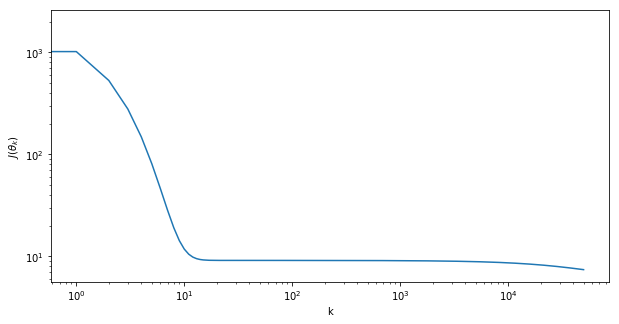

In [37]:
plot(hist_f);
xlabel("k")
ylabel(r"$J(\theta_k)$")
#ylim(0,10)
xscale('log')
yscale('log')

For comparison, let's get the actual values for $\theta_0$ and $\theta_1$:

In [39]:
from scipy import stats
actualvalues = stats.linregress(x,t)
print("Actual values for theta are:")
print("theta_0 =", actualvalues.intercept)
print("theta_1 =", actualvalues.slope)

Actual values for theta are:
theta_0 = 25.232304983426026
theta_1 = 3.2910945679475647


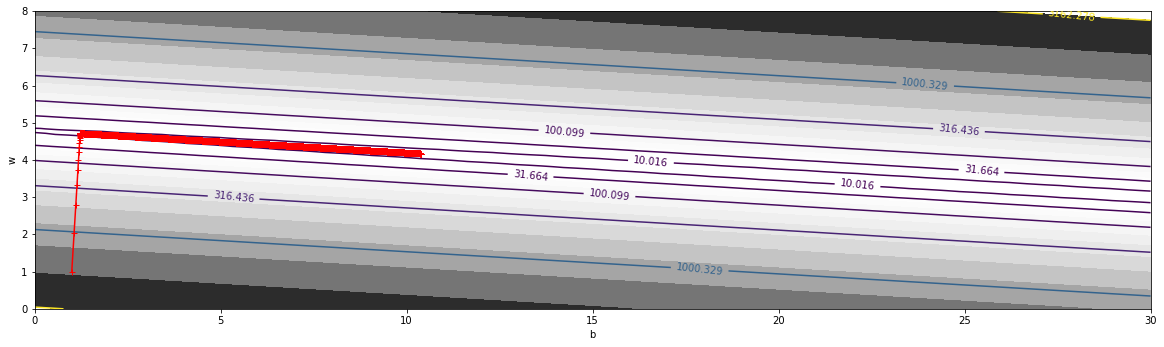

In [40]:
figure(figsize=(20,10))

# Compute J for every possible w, b  in the plot
grid_b, grid_w = np.mgrid[0:30:100j, 0:8:100j]
grid_J = np.zeros((100,100))
grid_theta = np.column_stack([grid_b.flatten(), grid_w.flatten()])
grid_J.flat = [J( theta) for theta in grid_theta]

# Do a contour plot with labels
plt.contourf(grid_b, grid_w, grid_J, np.logspace(0.001, 3.5, 20), cmap=plt.cm.gray_r)
plt.clabel(plt.contour(grid_b, grid_w, grid_J, np.logspace(0.001, 3.5, 8)))

xlabel("b")
ylabel("w")

#Plot our path
thetas = array(hist_x)
plot(thetas[:,0], thetas[:,1], marker='+', color='red')
axis('scaled')
show()

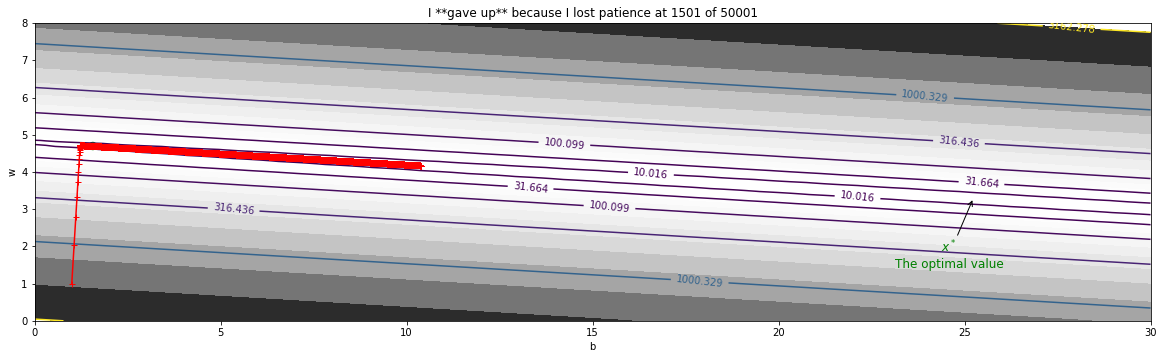

In [41]:
fig = figure(figsize=(20,10))

# Compute J for every possible w, b  in the plot
grid_b, grid_w = np.mgrid[0:30:100j, 0:8:100j]
grid_J = np.zeros((100,100))
grid_theta = np.column_stack([grid_b.flatten(), grid_w.flatten()])
grid_J.flat = [J( theta) for theta in grid_theta]

# Do a contour plot with labels
plt.contourf(grid_b, grid_w, grid_J, np.logspace(0.001, 3.5, 20), cmap=plt.cm.gray_r)
plt.clabel(plt.contour(grid_b, grid_w, grid_J, np.logspace(0.001, 3.5, 8)))

xlabel("b")
ylabel("w")

thetas = array(hist_x)
axis('scaled')

trajectory, = plot(thetas[:1,0], thetas[:1,1], marker='+', color='red')

annotate("$x^*$\nThe optimal value", (actualvalues.intercept, actualvalues.slope), 
         fontsize=12, color='green', horizontalalignment='center', 
         xytext=(-24,-70), textcoords='offset points', arrowprops={'arrowstyle':'->'} )
    
current = Circle( (thetas[0,0], thetas[0,1]), color='g', radius=0.1)
gca().add_patch(current)
#Plot our path

for k in range(1, len(thetas), 10):
    title("{} of {}".format(k, len(thetas)))
    trajectory.set_xdata(thetas[:k:10, 0])
    trajectory.set_ydata(thetas[:k:10, 1])
    current.center = (thetas[k,0], thetas[k,1])
    clear_output(wait=True)
    fig.canvas.draw()
    display(fig)
    if k >= 1500:
        title("I **gave up** because I lost patience at {} of {}".format(k, len(thetas)))
        trajectory.set_xdata(thetas[:, 0])
        trajectory.set_ydata(thetas[:, 1])
        break

clear_output(wait=True)

Our values are relatively close to the actual values (even though our method was pretty slow). If you look at the source code of [linregress](https://github.com/scipy/scipy/blob/master/scipy/stats/_stats_mstats_common.py), it uses the convariance matrix of x and y to compute fastly. Below, you can see a plot of the line drawn with our theta values against the data:

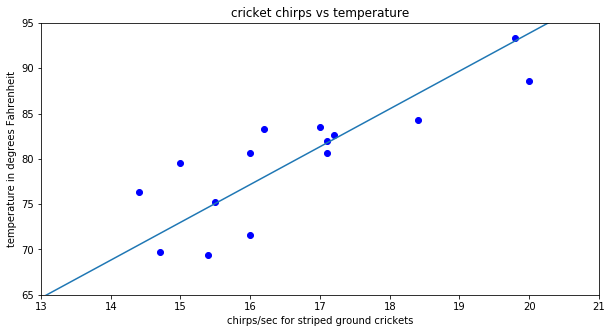

In [42]:
xx = np.linspace(0,21,1000)
scatter(x,t, marker='o', c='b')
plot(xx, y(xx, opt.x))
xlim([13,21])
ylim([65,95])
title('cricket chirps vs temperature')
xlabel('chirps/sec for striped ground crickets')
ylabel('temperature in degrees Fahrenheit')
show()

**Learning Rate Decay:** Note that unlike the previous function, this 2D example needed **smaller initial LR** and then it needed **higher LR later**.  Time based dacay woulf **be even slower** (so I wont show it). This makes the process of choosing a LR even more difficult!



So how can we adapt our stepsize to to the speed of convergence?

* Momementum already will slow us down if we keep changing direction
* But if we keep taking steps in the _same_ direction, we wouls like to speed up!
* When our parameter values have different scales, the best directions are _not_ always the steepest!

ADAM uses adaptive scales for each parameter, so each individual parameter changes with the same average speed (unless momentum slows it down when it osculates around a minima).  
 

It does so by computing a running estimate of the variance of past changes.  

In [43]:
class MyAdam(MomentumGD):
    def __init__(self, x, f, df, lr=0.01, decay=0.001, momentum=0.99, momentum2=0.99):
        super().__init__(x, f, df, lr, decay, momentum)
       
        self.momentum2 = momentum2
        self.velocity2 = np.zeros_like(x)
    
    def update(self):
        
        step = -self.df(self.x)
        
        self.velocity = self.velocity*self.momentum + (1-self.momentum)*step
        self.velocity2 = self.velocity2*self.momentum2 + (1-self.momentum2)*step**2
        
        # Correct bias (early iterations are too close to zero)
        v = self.velocity/(1+self.momentum**self.iterations)
        v2 = self.velocity2/(1+self.momentum2**self.iterations)
        
        eps = 1e-8  # To avoid division by zero
        self.x = self.x + self.lr * v / (sqrt(v2) + eps) 
                                     
        self.update_lr()

In [44]:
import torch.optim

In [45]:
opt = MyAdam(np.array([1., 1.]), J, grad_J, decay=0, momentum=0.99, momentum2=0.99, lr=.1)

hist_x = [opt.x]
hist_f = [opt.f(opt.x)]
for k in tq.tnrange(3000):
    opt.update()
    
    hist_x.append(copy(opt.x))
    hist_f.append(opt.f(opt.x))

Text(0,0.5,'$J(\\theta_k)$')

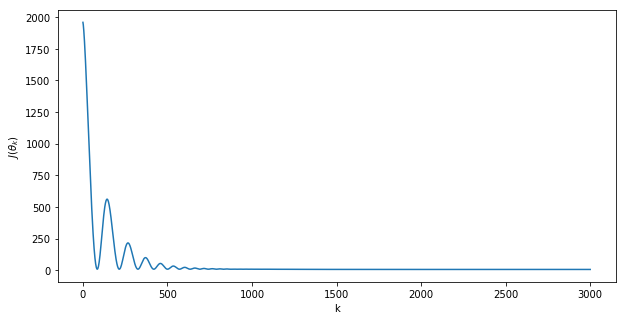

In [46]:
plot(hist_f);
xlabel("k")
ylabel(r"$J(\theta_k)$")
#xscale('log')
#yscale('log')

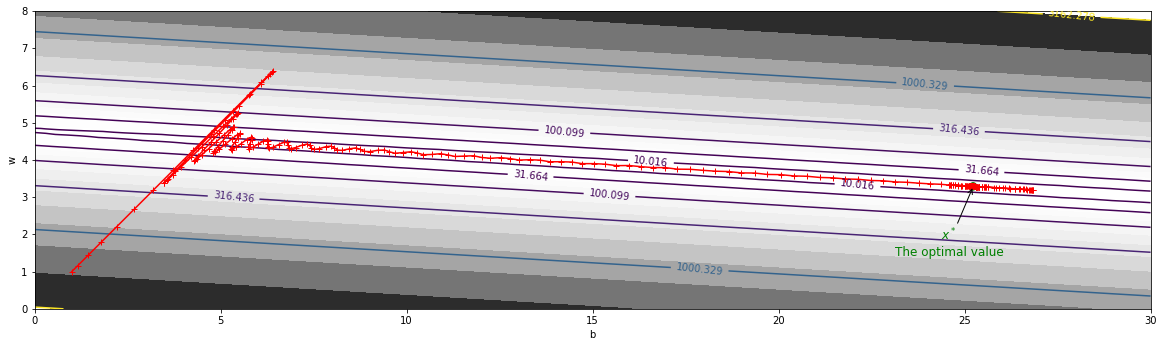

In [47]:
fig = figure(figsize=(20,10))

# Compute J for every possible w, b  in the plot
grid_b, grid_w = np.mgrid[0:30:100j, 0:8:100j]
grid_J = np.zeros((100,100))
grid_theta = np.column_stack([grid_b.flatten(), grid_w.flatten()])
grid_J.flat = [J( theta) for theta in grid_theta]

# Do a contour plot with labels
plt.contourf(grid_b, grid_w, grid_J, np.logspace(0.001, 3.5, 20), cmap=plt.cm.gray_r)
plt.clabel(plt.contour(grid_b, grid_w, grid_J, np.logspace(0.001, 3.5, 8)))

xlabel("b")
ylabel("w")

thetas = array(hist_x)
axis('scaled')

trajectory, = plot(thetas[:1,0], thetas[:1,1], marker='+', color='red')

annotate("$x^*$\nThe optimal value", (actualvalues.intercept, actualvalues.slope), 
         fontsize=12, color='green', horizontalalignment='center', 
         xytext=(-24,-70), textcoords='offset points', arrowprops={'arrowstyle':'->'} )
    
current = Circle( (thetas[0,0], thetas[0,1]), color='g', radius=0.1)
gca().add_patch(current)
#Plot our path
for k in range(1, len(thetas), 10):
    trajectory.set_xdata(thetas[:k:10, 0])
    trajectory.set_ydata(thetas[:k:10, 1])
    current.center = (thetas[k,0], thetas[k,1])
    clear_output(wait=True)
    fig.canvas.draw()
    display(fig)
clear_output(wait=True)

Notice that in the method above we need to calculate the gradient in every step of our algorithm. In the example with the crickets, this is not a big deal since there are only 15 data points. But imagine that we had 10 million data points. If this were the case, it would certainly make the method above far less efficient.

In machine learning, the algorithm above is often called variations of <b>batch gradient descent</b> to contrast it with <b>mini-batch gradient descent</b> (which we will not go into here) and <b>stochastic gradient descent</b>.

### Normalization

Another idea is to normalize the data, and the denormalize it. 

In [48]:
mu_x = np.mean(x, 0)
var_x = np.var(x, 0)

In [49]:
x_orig = x.copy()
x = (x_orig - mu_x)/sqrt(var_x)

In [50]:
def new_y(x, theta):
    # A new version that normalized befor calling 
    return y( (x-mu_x)/sqrt(var_x), theta)

In [51]:
opt = MomentumGD(np.array([1., 1.]), J, grad_J, decay=0, momentum=0, lr=.1)

hist_x = [opt.x]
hist_f = [opt.f(opt.x)]
for k in tq.tnrange(100):
    opt.update()
    
    hist_x.append(copy(opt.x))
    hist_f.append(opt.f(opt.x))

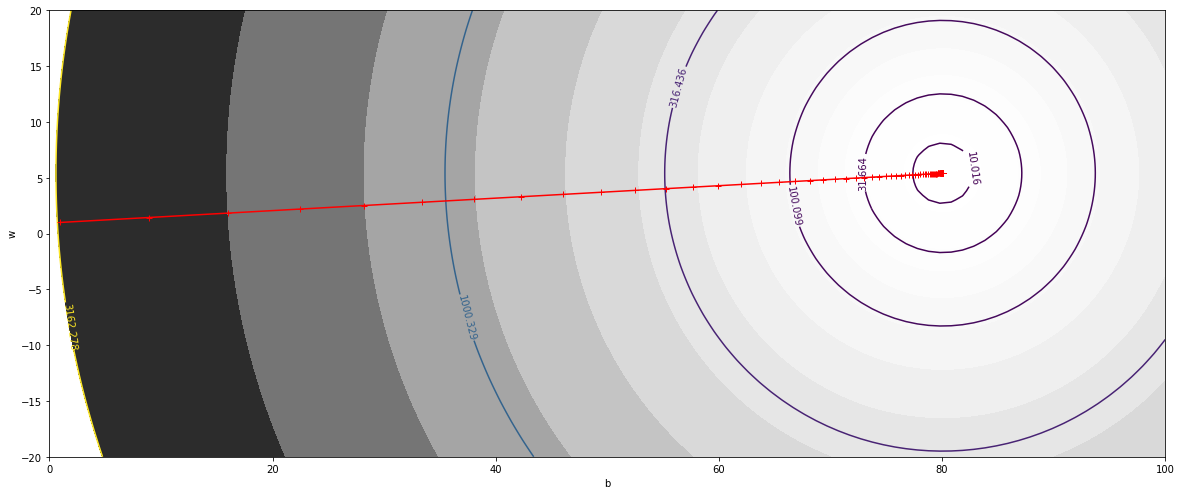

In [52]:
fig = figure(figsize=(20,10))

# Compute J for every possible w, b  in the plot
grid_b, grid_w = np.mgrid[0:100:100j, -20:20:100j]
grid_J = np.zeros((100,100))
grid_theta = np.column_stack([grid_b.flatten(), grid_w.flatten()])
grid_J.flat = [J( theta) for theta in grid_theta]

# Do a contour plot with labels
plt.contourf(grid_b, grid_w, grid_J, np.logspace(0.001, 3.5, 20), cmap=plt.cm.gray_r)
plt.clabel(plt.contour(grid_b, grid_w, grid_J, np.logspace(0.001, 3.5, 8)))

xlabel("b")
ylabel("w")

thetas = array(hist_x)
axis('scaled')

trajectory, = plot(thetas[:1,0], thetas[:1,1], marker='+', color='red')
    

current = Circle( (thetas[0,0], thetas[0,1]), color='g', radius=0.1)
gca().add_patch(current)
#Plot our path
for k in range(1, len(thetas)):
    trajectory.set_xdata(thetas[:k+1, 0])
    trajectory.set_ydata(thetas[:k+1, 1])
    current.center = (thetas[k,0], thetas[k,1])
    clear_output(wait=True)
    fig.canvas.draw()
    display(fig)
clear_output(wait=True)

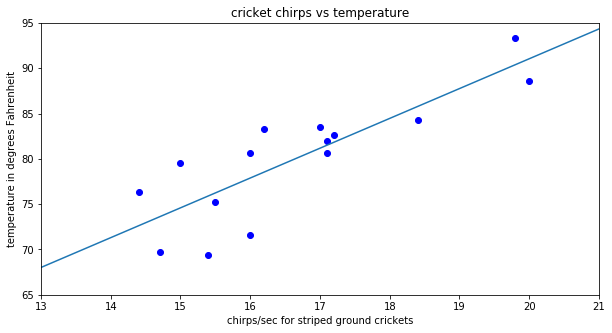

In [53]:
xx = np.linspace(0,21,1000)
scatter(x_orig,t, marker='o', c='b')
plot(xx, new_y(xx, opt.x))
xlim([13,21])
ylim([65,95])
title('cricket chirps vs temperature')
xlabel('chirps/sec for striped ground crickets')
ylabel('temperature in degrees Fahrenheit')
show()

# Batch Normalization

* The idea above is that if we _know_ the variaces $\sigma^2$ and the mean $\mu$ of our input, then we can improve the shape of our objective function.
* This is easy anough with out __inputs__, but it is harder to do for __latent__ variables whose distributions will change as the paremeters are updated. 
* Consider $f(x) = g(h(x| w_1)| w_2)$. Then changing $w_1$ changes the distribution of the inputs to $g$.
* Once the parameters $w_1, w_2$ are known we can always ensure that the distribution of $h(x|w_1^*)$ has normalized to $N(0,1)$ by subtracting the meah and dividing by the variance. 
* During __training__ we can use a running estimate for $\mu$ and $\sigma$, so that the weights we learn at each layer correspond to normalized input. 
* Then __latent__ variables can be normalized as well, making gradients more likely to point towards the minimum.

### Stochastic gradient descent

As we said above, in batch gradient descent, we must look at every example in the entire training set on every step (in cases where a training set is used for gradient descent). This can be quite slow if the training set is sufficiently large. In <b>stochastic gradient descent</b>, we update our values after looking at <i>each</i> item in the training set, so that we can start making progress right away. Recall the linear regression example above. In that example, we calculated the gradient for each of the two theta values as follows:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$

Where $h_\theta(x) = \theta_0 + \theta_1 x$

Then we followed this algorithm (where $\eta$ was a non-adapting stepsize):

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial guess $x_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $s_k$ = -$\nabla f(x_k)$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $x_{k+1} = x_k + \eta s_k$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;  <b>end for</b>

When the sample data had 15 data points as in the example above, calculating the gradient was not very costly. But for very large data sets, this would not be the case. So instead, we consider a stochastic gradient descent algorithm for simple linear regression such as the following, where m is the size of the data set:

### Pseudocode 4
&nbsp;&nbsp;&nbsp; 1: &nbsp; Randomly shuffle the data set <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>for</b> i = 1 to m <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\begin{bmatrix}
 \theta_{1} \\ 
 \theta_2 \\ 
 \end{bmatrix}=\begin{bmatrix}
 \theta_1 \\ 
 \theta_2 \\ 
 \end{bmatrix}-\eta\begin{bmatrix}
 2(h_\theta(x_i)-y_i) \\ 
 2x_i(h_\theta(x_i)-y_i) \\ 
 \end{bmatrix}$ <br>
&nbsp;&nbsp;&nbsp;    5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <b>end for</b> <br> 
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

Typically, with stochastic gradient descent, you will run through the entire data set 1 to 10 times (see value for k in line 2 of the pseudocode above), depending on how fast the data is converging and how large the data set is.

With batch gradient descent, we must go through the entire data set before we make any progress. With this algorithm though, we can make progress right away and continue to make progress as we go through the data set. Therefore, stochastic gradient descent is often preferred when dealing with large data sets.

Unlike gradient descent, stochastic gradient descent will tend to oscillate <i>near</i> a minimum value rather than continuously getting closer. It may never actually converge to the minimum though. One way around this is to slowly decrease the step size $\eta$ as the algorithm runs. However, this is less common than using a fixed $\eta$.



In [125]:
opt = MyAdam(np.array([1.,1.]), J, grad_J, lr=1, decay=0,momentum=0.99, momentum2=0.999)
thetas = [opt.x]
losses = [opt.f(opt.x)]
elosses = []
for epoch in range(100):
    # Draw sample in random order
    indices = np.random.choice(len(data), len(data), replace=False)
    
    cum_loss = 0
    for minibatch in data[indices,:,None]:  # Batch size is one
        x, t = minibatch
        # Optimizer refers to globals x and t, not ideal design
        opt.update()

        thetas.append(opt.x)
        losses.append(opt.f(opt.x))
        cum_loss += opt.f(opt.x)
    cum_loss /= len(data)
    elosses.append(cum_loss)

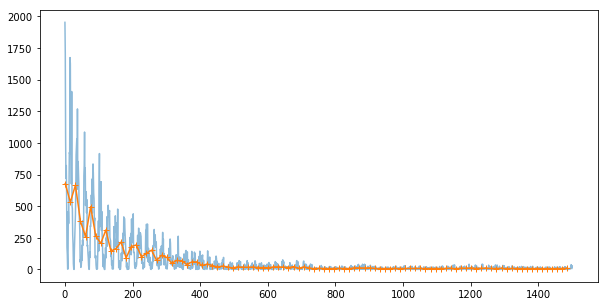

In [126]:
plot(losses, alpha=0.5)
plot(arange(1, len(losses), len(data)), elosses, marker='+')
#ylim(0, 30)

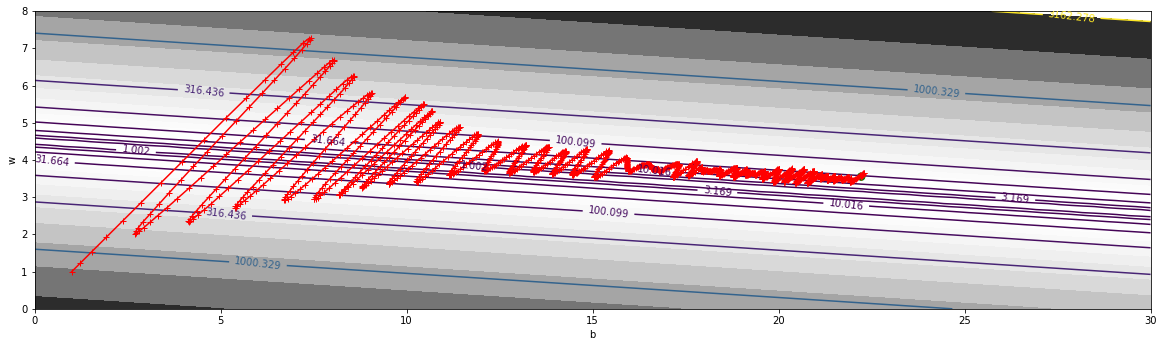

In [127]:
fig = figure(figsize=(20,10))

# Compute J for every possible w, b  in the plot
grid_b, grid_w = np.mgrid[0:30:100j, 0:8:100j]
grid_J = np.zeros((100,100))
grid_theta = np.column_stack([grid_b.flatten(), grid_w.flatten()])
grid_J.flat = [J( theta) for theta in grid_theta]

# Do a contour plot with labels
plt.contourf(grid_b, grid_w, grid_J, np.logspace(0.001, 3.5, 20), cmap=plt.cm.gray_r)
plt.clabel(plt.contour(grid_b, grid_w, grid_J, np.logspace(0.001, 3.5, 8)))

xlabel("b")
ylabel("w")

thetas = array(thetas)
axis('scaled')

trajectory, = plot(thetas[:1,0], thetas[:1,1], marker='+', color='red')
    

current = Circle( (thetas[0,0], thetas[0,1]), color='g', radius=0.1)
gca().add_patch(current)
#Plot our path
for k in range(1, len(thetas)):
    trajectory.set_xdata(thetas[:k+1, 0])
    trajectory.set_ydata(thetas[:k+1, 1])
    current.center = (thetas[k,0], thetas[k,1])
    if (k % len(data)) == 0:
        clear_output(wait=True)
        fig.canvas.draw()
        display(fig)
clear_output(wait=True)